In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cufflinks as cl
import plotly as pl
%matplotlib inline
import seaborn as sns
import pickle

In [2]:
import plotly.offline as po
po.init_notebook_mode(connected=True)
cl.go_offline()

In [3]:
df=pd.read_csv("houses_to_rent_v2.csv",)

In [4]:
df.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [7]:

df['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [8]:
def gh(df):
    for i in range(len(df)):
        if df[i]=='-':
            df[i]=str(0)
    return df
df['floor']=gh(df['floor'])
df.head()
df['floor'] = df['floor'].astype('int64')

In [9]:
def furniture(df):
    for i in range(len(df)):
        if df[i]=='furnished':
            df[i]=1
        else:
            df[i]=0
    return df
df['furniture']=furniture(df['furniture']).astype('int64')

In [10]:

df['floor'].unique()

array([  7,  20,   6,   2,   1,   0,   4,   3,  10,  11,  24,   9,   8,
        17,  18,   5,  13,  15,  16,  14,  26,  12,  21,  19,  22,  27,
        23,  35,  25,  46,  28,  29, 301,  51,  32], dtype=int64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null int64
animal                 10692 non-null object
furniture              10692 non-null int64
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.1+ MB


In [12]:
def gh(df):
    for i in range(len(df)):
        if df[i]=='acept':
            df[i]=1
        else:
            df[i]=0
    return df
df['animal']=gh(df['animal']).astype('int64')

In [13]:
df['animal'].unique()

array([1, 0], dtype=int64)

In [14]:
df['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

Text(0, 0.5, 'total (R$)')

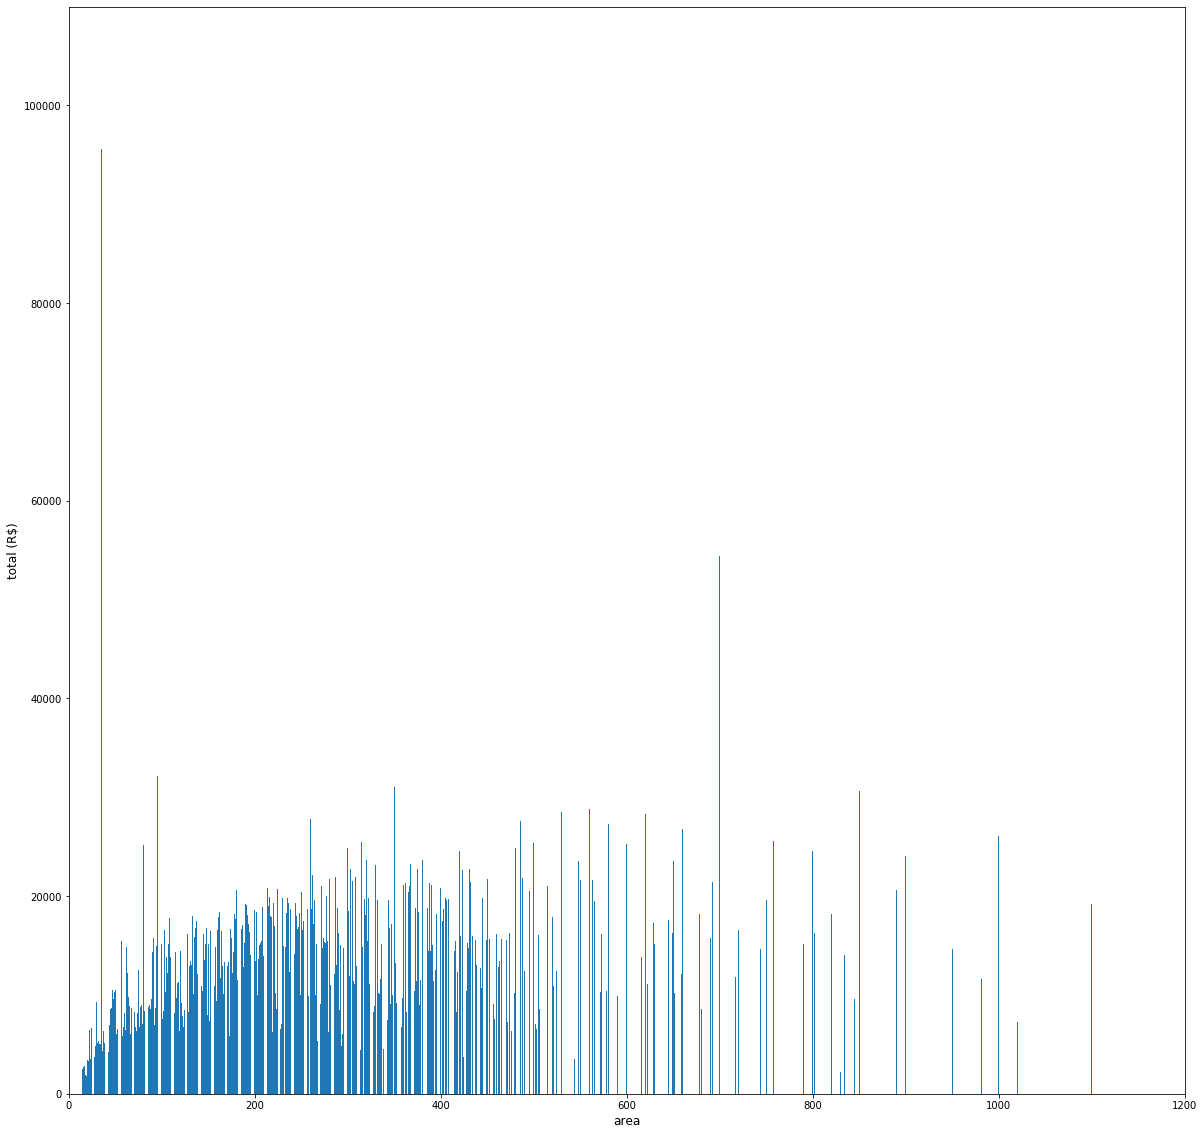

In [15]:
plt.figure(figsize=[20,20])
plt.bar(df['area'],df['total (R$)'])
plt.xlim(0, 1200)
plt.ylim(0,110000)
plt.xlabel('area',fontsize=12)
plt.ylabel('total (R$)',fontsize=12)


In [16]:
plt.figure(figsize=[20,20])
df.iplot(kind='bar',y='total (R$)',x='area',)# this is show real time value of each point and also we can analysis particular point


<Figure size 1440x1440 with 0 Axes>

In [17]:
df[['hoa (R$)','rent amount (R$)','property tax (R$)','fire insurance (R$)','total (R$)']].iplot(kind="bar",mode='markers',size=7)

In [18]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [19]:
df.describe()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,0.777778,0.243734,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,0.415759,0.429354,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.000000,0.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.000000,1.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null int64
animal                 10692 non-null int64
furniture              10692 non-null int64
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


In [21]:
df1=pd.get_dummies(df)

In [22]:
df1.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,1,1,2065,3300,211,42,5618,0,0,0,0,1
1,320,4,4,0,20,1,0,1200,4960,1750,63,7973,0,0,0,0,1
2,80,1,1,1,6,1,0,1000,2800,0,41,3841,0,0,1,0,0
3,51,2,1,0,2,1,0,270,1112,22,17,1421,0,0,1,0,0
4,25,1,1,0,1,0,0,0,800,25,11,836,0,0,0,0,1


In [23]:
df1.describe()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000
mean,149.217920,2.506079,2.236813,1.609147,5.067995,0.777778,0.243734,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03,0.117658,0.079779,0.111579,0.140385,0.550599
std,537.016942,1.171266,1.407198,1.589521,6.069050,0.415759,0.429354,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04,0.322218,0.270964,0.314862,0.347403,0.497456
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03,0.000000,0.000000,0.000000,0.000000,1.000000
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.000000,0.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03,0.000000,0.000000,0.000000,0.000000,1.000000
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.000000,1.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 720x720 with 0 Axes>

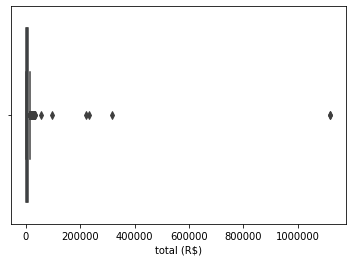

<Figure size 720x720 with 0 Axes>

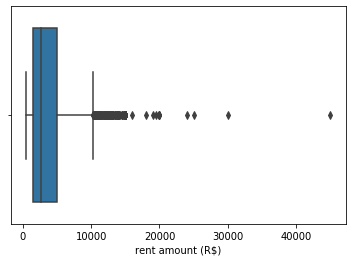

<Figure size 720x720 with 0 Axes>

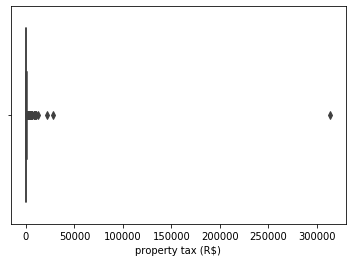

<Figure size 720x720 with 0 Axes>

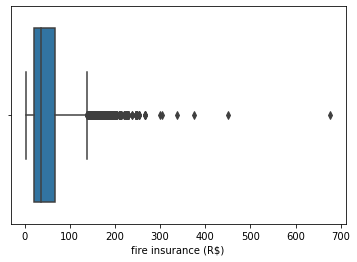

In [24]:
k=['total (R$)','rent amount (R$)','property tax (R$)', 'fire insurance (R$)']
#fig, ax = plt.subplots(4)
def grap(k,df):
    for i in  k:
        plt.figure(figsize=(10,10))
        fig, ax = plt.subplots()
        sns.boxplot(df[i])
        plt.show()
k=['total (R$)','rent amount (R$)','property tax (R$)', 'fire insurance (R$)']
grap(k,df)

In [25]:
def remove_outlier(df1,col):
    q1=df1[col].quantile(.25)
    q2=df1[col].quantile(.60)
    iqr=q2-q1
    upper_bound=iqr*1.5+q2
    lower_bound=q1-iqr*1.5
    df_out=df1.loc[(df1[col]>=lower_bound) & (df1[col]<=upper_bound) ]
    return df_out

In [26]:
df2=remove_outlier(df1,'rent amount (R$)')

<Figure size 720x720 with 0 Axes>

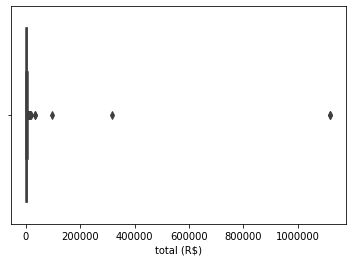

<Figure size 720x720 with 0 Axes>

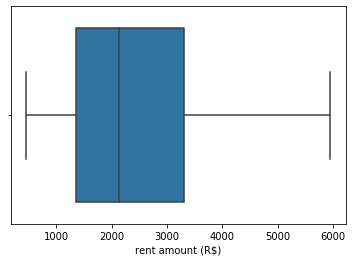

<Figure size 720x720 with 0 Axes>

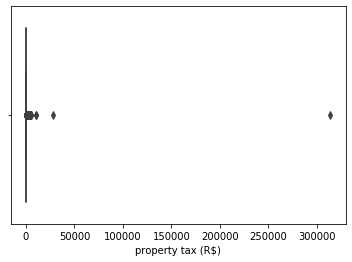

<Figure size 720x720 with 0 Axes>

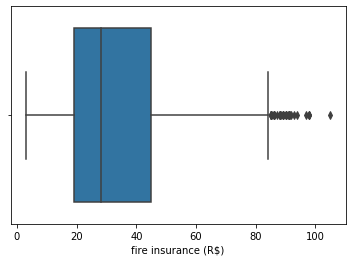

In [27]:
k=['total (R$)','rent amount (R$)','property tax (R$)', 'fire insurance (R$)']
grap(k,df2)

In [28]:
df1.shape

(10692, 17)

In [29]:
df2.shape

(8511, 17)

In [30]:
def compare(df1,df2,col):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    sns.distplot(df2[col])
    plt.title("after remove outlier")
    plt.subplot(2,2,2)
    sns.distplot(df1[col])
    plt.title("before remove outlier ")
    plt.show()

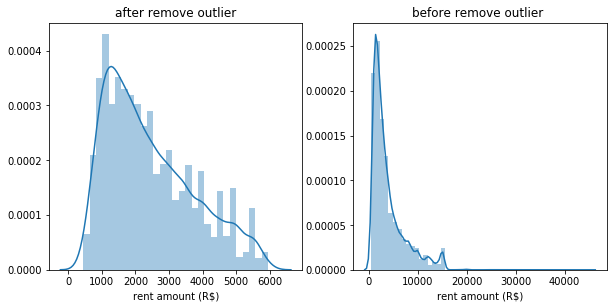

In [31]:
compare(df1,df2,'rent amount (R$)')

In [32]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [33]:
def  facilitate(df,x,y):
    k=1
    plt.figure(figsize=(20, 5))
    sns.set(style = 'whitegrid')
    for i in x:
        plt.subplot(2,2,k)
        sns.barplot(x=i,y=y,data=df2)
        k+=1
        
    

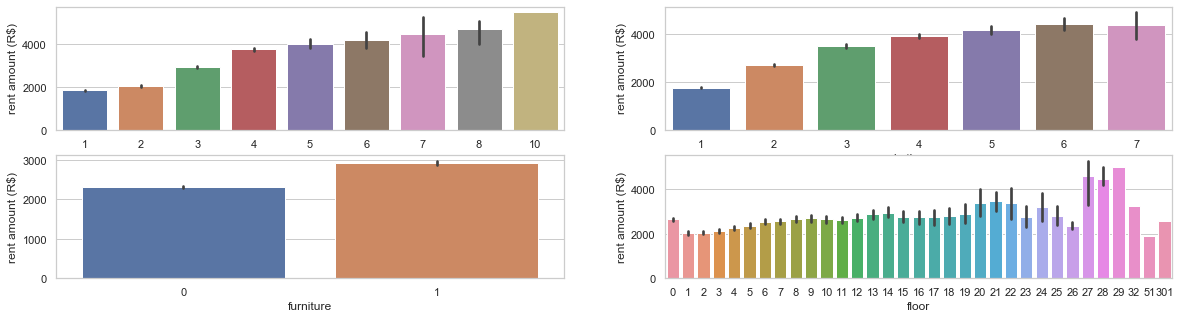

In [34]:
x=['rooms','bathroom','furniture','floor']
facilitate(df2,x,'rent amount (R$)')

In [35]:
df2.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,1,1,2065,3300,211,42,5618,0,0,0,0,1
1,320,4,4,0,20,1,0,1200,4960,1750,63,7973,0,0,0,0,1
2,80,1,1,1,6,1,0,1000,2800,0,41,3841,0,0,1,0,0
3,51,2,1,0,2,1,0,270,1112,22,17,1421,0,0,1,0,0
4,25,1,1,0,1,0,0,0,800,25,11,836,0,0,0,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null int64
animal                 10692 non-null int64
furniture              10692 non-null int64
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


In [37]:
df2.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,1,1,2065,3300,211,42,5618,0,0,0,0,1
1,320,4,4,0,20,1,0,1200,4960,1750,63,7973,0,0,0,0,1
2,80,1,1,1,6,1,0,1000,2800,0,41,3841,0,0,1,0,0
3,51,2,1,0,2,1,0,270,1112,22,17,1421,0,0,1,0,0
4,25,1,1,0,1,0,0,0,800,25,11,836,0,0,0,0,1


In [38]:
y=df2["total (R$)"]
y.head()

0    5618
1    7973
2    3841
3    1421
4     836
Name: total (R$), dtype: int64

In [39]:
x=df2.drop(['total (R$)'],axis=1)
x.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,1,1,2065,3300,211,42,0,0,0,0,1
1,320,4,4,0,20,1,0,1200,4960,1750,63,0,0,0,0,1
2,80,1,1,1,6,1,0,1000,2800,0,41,0,0,1,0,0
3,51,2,1,0,2,1,0,270,1112,22,17,0,0,1,0,0
4,25,1,1,0,1,0,0,0,800,25,11,0,0,0,0,1


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=True)

In [42]:
x_train.shape,x_test.shape

((6808, 16), (1703, 16))

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [44]:
model=LinearRegression()

In [45]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
predict=model.predict(x_test)

In [47]:
y_test.shape

(1703,)

In [48]:
y_test.values    

array([4065, 4561, 5914, ..., 2021, 2043, 4051], dtype=int64)

In [49]:
a=mean_absolute_error(y_test,predict)
a

0.47077879952923896

In [50]:
np.sqrt(mean_squared_error(y_test,predict))

7.815224826623148

In [51]:
r2_score(y_test,predict)

0.9999857476455634

In [52]:
mean_squared_error(y_test,predict)

61.07773909066682

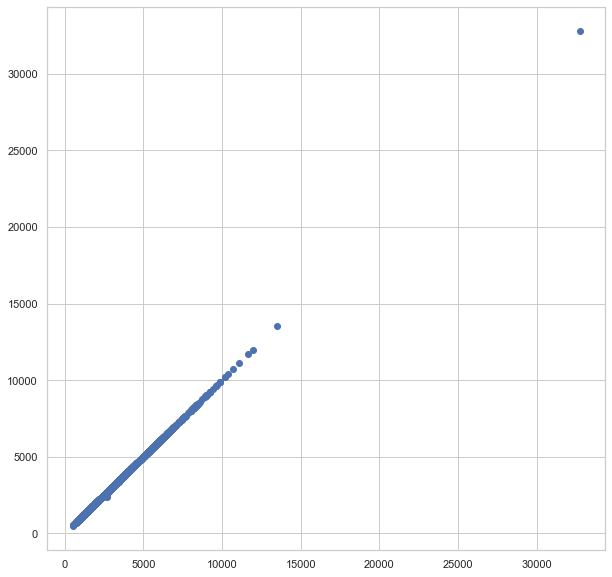

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,predict)

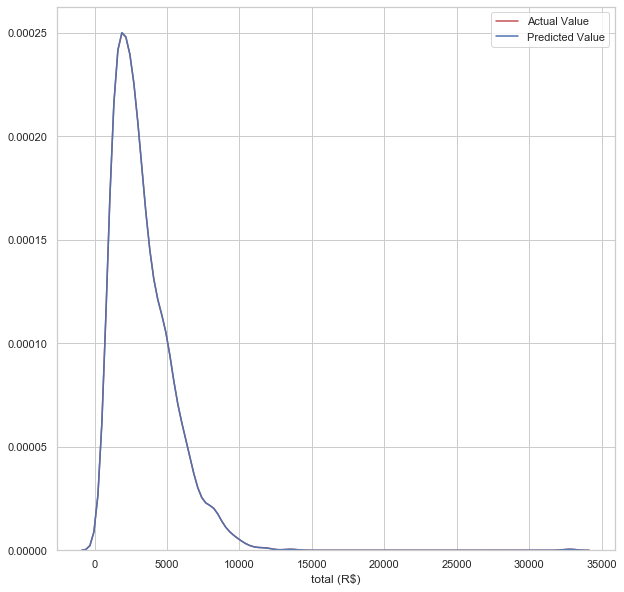

In [54]:
plt.figure(figsize=(10,10))
ax1=sns.distplot(y_test,hist=False,kde =True,color ="r",label ="Actual Value")
sns.distplot(predict ,color ="b",hist = False,kde =True, label = "Predicted Value",ax =ax1)

In [55]:
y_test.values

array([4065, 4561, 5914, ..., 2021, 2043, 4051], dtype=int64)

In [56]:
predict

array([4064.85403412, 4561.21307664, 5914.09588269, ..., 2021.44824655,
       2043.32515975, 4051.09797304])

In [57]:
acc = []
# parameters are the alpha's that we will use to perform the GridSearch
parameters1= [{'alpha': [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
# on the regressors we define the models that we want use
regressors = {
              'Ridge Model': Ridge(alpha=0.1),
              'Decision Tree': DecisionTreeRegressor(),
              'Random Forest': RandomForestRegressor(random_state=1),
              'SVR': SVR(),
              'KNN': KNeighborsRegressor(),
              'Lasso': Lasso(),
              'GridSearchRidge': GridSearchCV(Ridge(), parameters1, cv=4),
              'GridSearchLasso': GridSearchCV(Lasso(), parameters1, cv=4)
             }

In [58]:
for i in regressors:
    model = regressors.get(i)
    # here we create a condition because for grid we want to perform the model with the best estimator
    if i == 'GridSearchRidge' or i == 'GridSearchLasso':
        model.fit(x_train, y_train).best_estimator_ 
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    filename=str(i)+'final_model.sav'
    pickle.dump(model,open(filename,'wb'))
    print(i)
    print('MAE:', mean_absolute_error(y_test, prediction))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
    print('R2:', r2_score(y_test, prediction))
    print('*' * 40)
    acc.append([i, mean_absolute_error(y_test, prediction), np.sqrt(mean_squared_error(y_test, prediction)), r2_score(y_test, prediction)])

Ridge Model
MAE: 0.47077202600657997
RMSE: 7.815224618519162
R2: 0.9999857476463224
****************************************
Decision Tree
MAE: 101.96535525543159
RMSE: 702.0359733854009
R2: 0.8849934978401933
****************************************


C:\Users\NEERAJ\Anaconda3\anconda4\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Random Forest
MAE: 66.2303581914269
RMSE: 682.9806630849619
R2: 0.891151994029805
****************************************


C:\Users\NEERAJ\Anaconda3\anconda4\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVR
MAE: 1501.264412947936
RMSE: 2115.7375718748694
R2: -0.044545250237648215
****************************************
KNN
MAE: 45.99553728714033
RMSE: 451.53877860583606
R2: 0.9524233597994708
****************************************
Lasso
MAE: 0.5215386921981027
RMSE: 7.814395990711811
R2: 0.9999857506684418
****************************************


C:\Users\NEERAJ\Anaconda3\anconda4\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=3.99131e-17): result may not be accurate.

C:\Users\NEERAJ\Anaconda3\anconda4\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=3.99215e-17): result may not be accurate.

C:\Users\NEERAJ\Anaconda3\anconda4\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=4.00344e-17): result may not be accurate.

C:\Users\NEERAJ\Anaconda3\anconda4\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=3.98809e-17): result may not be accurate.

C:\Users\NEERAJ\Anaconda3\anconda4\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=3.99131e-17): result may not be accurate.

C:\Users\NEERAJ\Anaconda3\anconda4\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning:

Ill-conditi

GridSearchRidge
MAE: 0.47077879275499895
RMSE: 7.815224826415281
R2: 0.9999857476455641
****************************************
GridSearchLasso
MAE: 0.470490621725434
RMSE: 7.815248836359682
R2: 0.9999857475579919
****************************************


In [59]:
acc

[['Ridge Model', 0.47077202600657997, 7.815224618519162, 0.9999857476463224],
 ['Decision Tree', 101.96535525543159, 702.0359733854009, 0.8849934978401933],
 ['Random Forest', 66.2303581914269, 682.9806630849619, 0.891151994029805],
 ['SVR', 1501.264412947936, 2115.7375718748694, -0.044545250237648215],
 ['KNN', 45.99553728714033, 451.53877860583606, 0.9524233597994708],
 ['Lasso', 0.5215386921981027, 7.814395990711811, 0.9999857506684418],
 ['GridSearchRidge',
  0.47077879275499895,
  7.815224826415281,
  0.9999857476455641],
 ['GridSearchLasso', 0.470490621725434, 7.815248836359682, 0.9999857475579919]]

In [63]:
loaded_model=pickle.load(open('Decision Treefinal_model.sav','rb'))

In [65]:
result=loaded_model.score(x_test,y_test)

In [66]:
result

0.8849934978401933